In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import tensorflow as tf
from tensorflow.keras import datasets, layers, models,callbacks
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
with h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5','r') as hdf:
    ls=list(hdf.keys())
    print('List of Datasets',ls)
    X_train=np.array(hdf.get('X_train'))
    X_test=np.array(hdf.get('X_test'))
    X_val=np.array(hdf.get('X_val'))
    y_train=np.array(hdf.get('y_train'))
    y_test=np.array(hdf.get('y_test'))
    y_val=np.array(hdf.get('y_val'))

List of Datasets ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [20]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('X_val',X_val.shape)

X_train (42000, 32, 32)
X_test (18000, 32, 32)
X_val (60000, 32, 32)


## Visualize Data

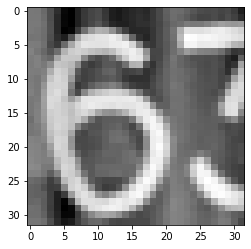

In [24]:
plt.imshow(X_train[1],cmap=plt.cm.binary)
plt.show()

## Data Preprocessing

In [5]:
#Normalize Data
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)
X_val=tf.keras.utils.normalize(X_val,axis=1)

## Train Model - ANN

In [6]:
#Train Model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32,32)))
model.add(tf.keras.layers.Dense(512,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [9]:
#call backs
e_stop=callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min',restore_best_weights=True,verbose=0)
chk_pt=callbacks.ModelCheckpoint('./checkpoint',monitor='val_loss',verbose=0,save_best_only=True,save_freq='epoch')

In [10]:
history=model.fit(X_train,y_train,epochs=200, verbose=1, validation_data=(X_val,y_val),callbacks=[e_stop,chk_pt])

Epoch 1/200
1313/1313 [==============================] - 10s 7ms/step - loss: 2.3059 - accuracy: 0.1027 - val_loss: 2.3015 - val_accuracy: 0.1130
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 2/200
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3016 - accuracy: 0.1089 - val_loss: 2.2983 - val_accuracy: 0.1259
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 3/200
1313/1313 [==============================] - 8s 6ms/step - loss: 2.2995 - accuracy: 0.1162 - val_loss: 2.2941 - val_accuracy: 0.1446
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 4/200
1313/1313 [==============================] - 8s 6ms/step - loss: 2.2960 - accuracy: 0.1202 - val_loss: 2.2849 - val_accuracy: 0.1786
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 5/200
1313/1313 [==============================] - 8s 6ms/step - loss: 2.2879 - accuracy: 0.1382 - val_loss: 2.2696 - val_accuracy: 0.2074
INFO:tensorflow:Assets written to: .\checkpoint\assets

Epoch 42/200
1313/1313 [==============================] - 8s 6ms/step - loss: 1.3285 - accuracy: 0.5804 - val_loss: 1.2042 - val_accuracy: 0.6401
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 43/200
1313/1313 [==============================] - 8s 6ms/step - loss: 1.3320 - accuracy: 0.5837 - val_loss: 1.1954 - val_accuracy: 0.6429
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 44/200
1313/1313 [==============================] - 8s 6ms/step - loss: 1.3055 - accuracy: 0.5916 - val_loss: 1.1842 - val_accuracy: 0.6457
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 45/200
1313/1313 [==============================] - 8s 6ms/step - loss: 1.2982 - accuracy: 0.5908 - val_loss: 1.1675 - val_accuracy: 0.6511
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 46/200
1313/1313 [==============================] - 8s 6ms/step - loss: 1.2896 - accuracy: 0.5949 - val_loss: 1.1601 - val_accuracy: 0.6521
INFO:tensorflow:Assets written to: .\checkpoint\as

1313/1313 [==============================] - 8s 6ms/step - loss: 1.0053 - accuracy: 0.6885 - val_loss: 0.8953 - val_accuracy: 0.7302
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 84/200
1313/1313 [==============================] - 8s 6ms/step - loss: 1.0110 - accuracy: 0.6900 - val_loss: 0.8875 - val_accuracy: 0.7341
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 85/200
1313/1313 [==============================] - 8s 6ms/step - loss: 1.0083 - accuracy: 0.6938 - val_loss: 0.8893 - val_accuracy: 0.7321
Epoch 86/200
1313/1313 [==============================] - 8s 6ms/step - loss: 1.0009 - accuracy: 0.6926 - val_loss: 0.8912 - val_accuracy: 0.7284
Epoch 87/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.9949 - accuracy: 0.6946 - val_loss: 0.8761 - val_accuracy: 0.7361
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 88/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.9882 - accuracy: 0.6990 - val_loss: 0.

1313/1313 [==============================] - 8s 6ms/step - loss: 0.8258 - accuracy: 0.7467 - val_loss: 0.7156 - val_accuracy: 0.7848
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 128/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.8206 - accuracy: 0.7473 - val_loss: 0.7158 - val_accuracy: 0.7840
Epoch 129/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.8328 - accuracy: 0.7453 - val_loss: 0.7096 - val_accuracy: 0.7859
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 130/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.8134 - accuracy: 0.7496 - val_loss: 0.7111 - val_accuracy: 0.7857
Epoch 131/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.8155 - accuracy: 0.7480 - val_loss: 0.7068 - val_accuracy: 0.7863
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 132/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.8056 - accuracy: 0.7505 - val_los

Epoch 173/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.6940 - accuracy: 0.7880 - val_loss: 0.6102 - val_accuracy: 0.8158
Epoch 174/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.7024 - accuracy: 0.7807 - val_loss: 0.6086 - val_accuracy: 0.8164
Epoch 175/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.7001 - accuracy: 0.7868 - val_loss: 0.6021 - val_accuracy: 0.8169
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 176/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.6901 - accuracy: 0.7851 - val_loss: 0.5972 - val_accuracy: 0.8209
INFO:tensorflow:Assets written to: .\checkpoint\assets
Epoch 177/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.6984 - accuracy: 0.7836 - val_loss: 0.5972 - val_accuracy: 0.8194
Epoch 178/200
1313/1313 [==============================] - 8s 6ms/step - loss: 0.6891 - accuracy: 0.7870 - val_loss: 0.5957 - val_accuracy: 0.8187
INFO:ten

In [19]:
history.history

## Plot Data CNN

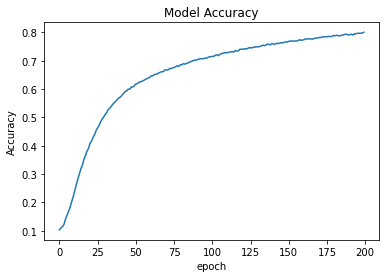

In [13]:
# Plot History
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

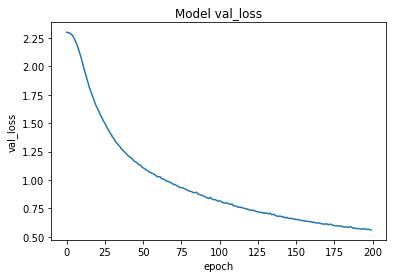

In [18]:
# Plot History
plt.plot(history.history['val_loss'])
plt.title('Model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

## Train Model CNN

In [36]:
# Data Preprocessing for CNN
X_train=X_train.reshape(-1,32,32,1)
X_test=X_test.reshape(-1,32,32,1)
X_val=X_val.reshape(-1,32,32,1)

In [43]:
cnn_model=models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,1)),
    layers.MaxPooling2D((2,2)),
    
    #Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')  
])

In [44]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_hist=cnn_model.fit(X_train,y_train,epochs=20,batch_size=50, verbose=1, validation_data=(X_val,y_val))

Epoch 1/20
840/840 [==============================] - 22s 26ms/step - loss: 1.9166 - accuracy: 0.3055 - val_loss: 0.8184 - val_accuracy: 0.7674
Epoch 2/20
840/840 [==============================] - 22s 26ms/step - loss: 0.7572 - accuracy: 0.7804 - val_loss: 0.6347 - val_accuracy: 0.8227
Epoch 3/20
840/840 [==============================] - 22s 26ms/step - loss: 0.6032 - accuracy: 0.8282 - val_loss: 0.5731 - val_accuracy: 0.8315
Epoch 4/20
840/840 [==============================] - 22s 26ms/step - loss: 0.5446 - accuracy: 0.8426 - val_loss: 0.5110 - val_accuracy: 0.8539
Epoch 5/20
840/840 [==============================] - 22s 26ms/step - loss: 0.5011 - accuracy: 0.8551 - val_loss: 0.4832 - val_accuracy: 0.8621
Epoch 6/20
840/840 [==============================] - 22s 26ms/step - loss: 0.4614 - accuracy: 0.8658 - val_loss: 0.4446 - val_accuracy: 0.8727
Epoch 7/20
840/840 [==============================] - 22s 26ms/step - loss: 0.4297 - accuracy: 0.8734 - val_loss: 0.4217 - val_accuracy:

## Plot Data

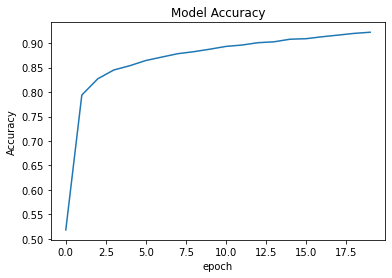

In [45]:
# Plot History
plt.plot(cnn_hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

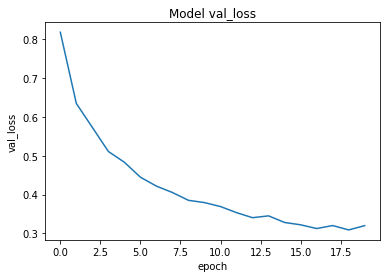

In [46]:
# Plot History
plt.plot(cnn_hist.history['val_loss'])
plt.title('Model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.show()

## Observations
- The validation loss was stuck and was not improvong with epochs. Fixed this by reducing the learning rate of the optimizer to 0.00001.
- The ANN model took 200 epochs to reach 80 % accuracy compared to a CNN model which gave accuracy of 92 % in 20 epochs




In [47]:
#Predict for random data points
def predict_random(i):
    y_predict_t=cnn_model.predict(X_test)
    y_predict_classes=[np.argmax(element) for element in y_predict_t]
    print('y_pred',y_predict_classes[i])
    print('y',y_test[i])
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.show()

y_pred 7
y 7


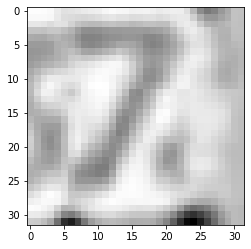

In [50]:
predict_random((np.random.randint(1000)))